In [1]:
# importing libraries to be used

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
# Load dataset 

data=pd.read_csv("train.csv")

In [3]:
# checking the dimension of data

data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# info of dataset, to identify which feature to clean

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# drop Id and Utilities as it is of no use

data=data.drop("Id",axis=1)
data=data.drop("Utilities", axis=1)

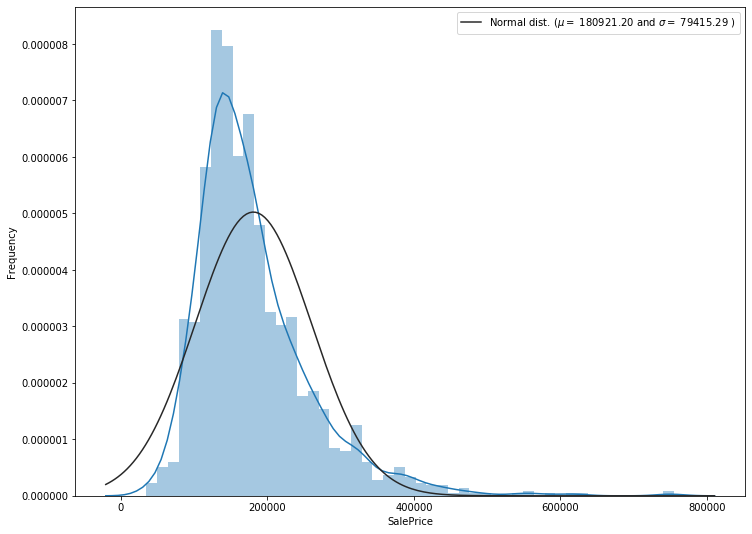

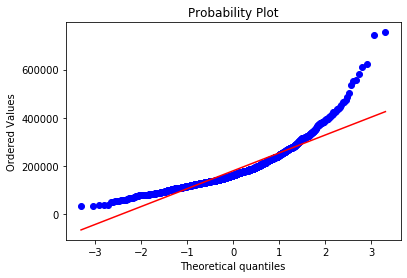

In [7]:
# Plot of sale price range distribution

plt.subplots(figsize=(12,9))
sns.distplot(data.SalePrice, fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data.SalePrice)

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(data.SalePrice, plot=plt)
plt.show()

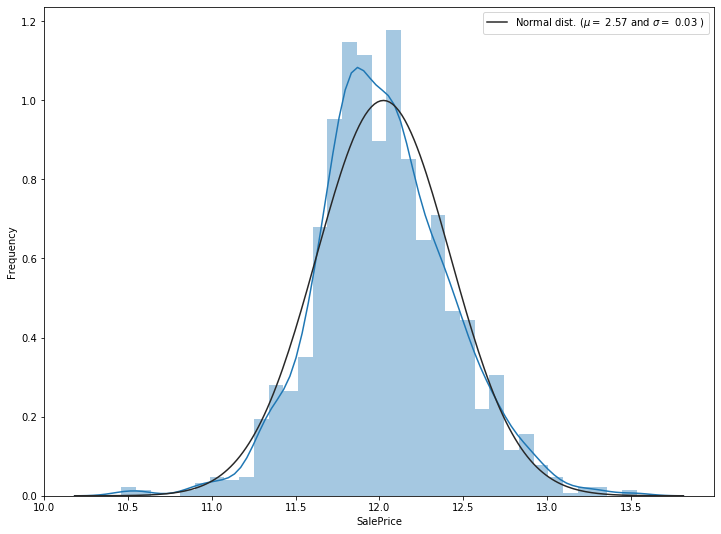

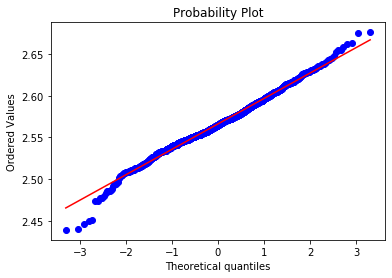

In [8]:
# again ploting sale price by taking log1 of it.

plt.subplots(figsize=(12,9))
data.SalePrice=np.log1p(data.SalePrice)
sns.distplot(data.SalePrice, fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(np.log1p(data.SalePrice))

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(np.log1p(data.SalePrice), plot=plt)
plt.show()

In [9]:
# features with missing values

data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

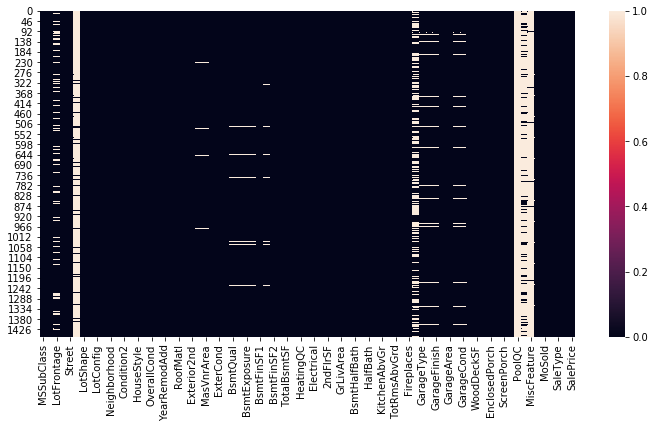

In [10]:
# heatmap of features; showing the density of missing values and non missing

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull())
plt.show()

In [11]:
# features with count of null rows

with_null = data.isnull().sum()
with_null = with_null[with_null>0]
with_null.sort_values(inplace=True, ascending=False)
with_null

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [12]:
# features with missing values are substituted with

# 1. object dtype with None
col_null=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',\
          'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']  

for col in col_null:
    data[col] = data[col].fillna('None')
    

# 2. float dtype with 0
col_int_null=['GarageYrBlt','MasVnrArea']

for col in col_int_null:
    data[col]=data[col].fillna(int(0))
    

# 3. LotFrontage with common HouseStyle    
data.LotFrontage = data.groupby("HouseStyle")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


# 4. Electrical with mode
data.Electrical = data.Electrical.fillna(data.Electrical).mode()[0]

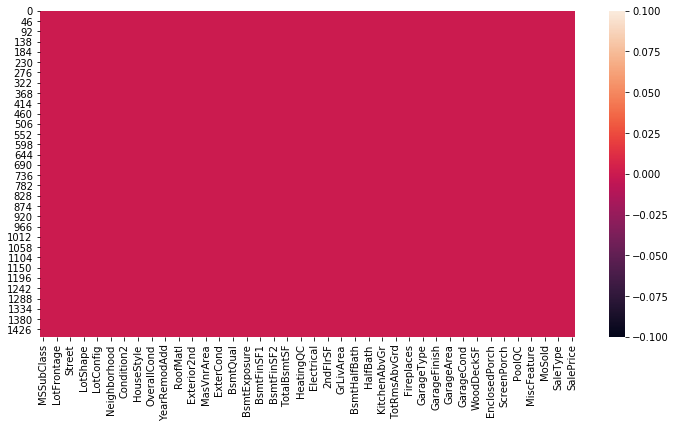

In [13]:
# again plotting heatmap to check the density of missing values

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull())
plt.show()

In [14]:
data.GarageYrBlt=data.GarageYrBlt.astype(str)
data.MasVnrArea= data.MasVnrArea.astype(str)

In [15]:
# overcasting

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond','YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType','GarageYrBlt','MiscFeature','MasVnrArea','SaleType', 'SaleCondition', 'Electrical', 'Heating')

from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c])) 
    data[c] = lbl.transform(list(data[c]))

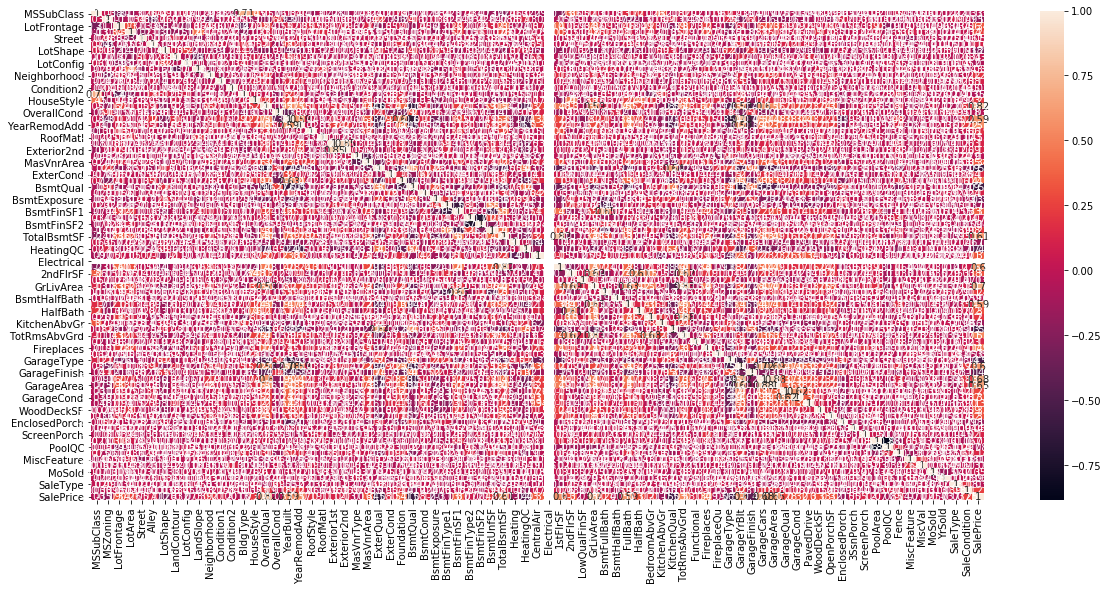

In [16]:
# drawing correlation graph 

train_corr = data.select_dtypes(include=[np.number])
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

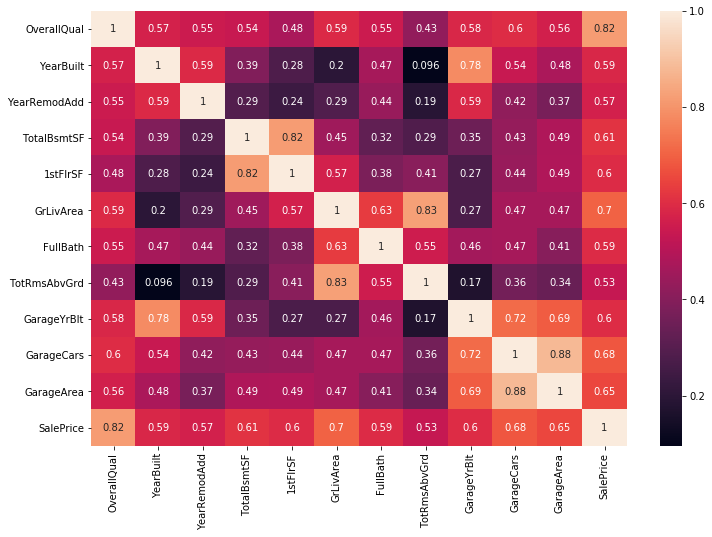

In [17]:
# correlation graph of top features in context of sale price

top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

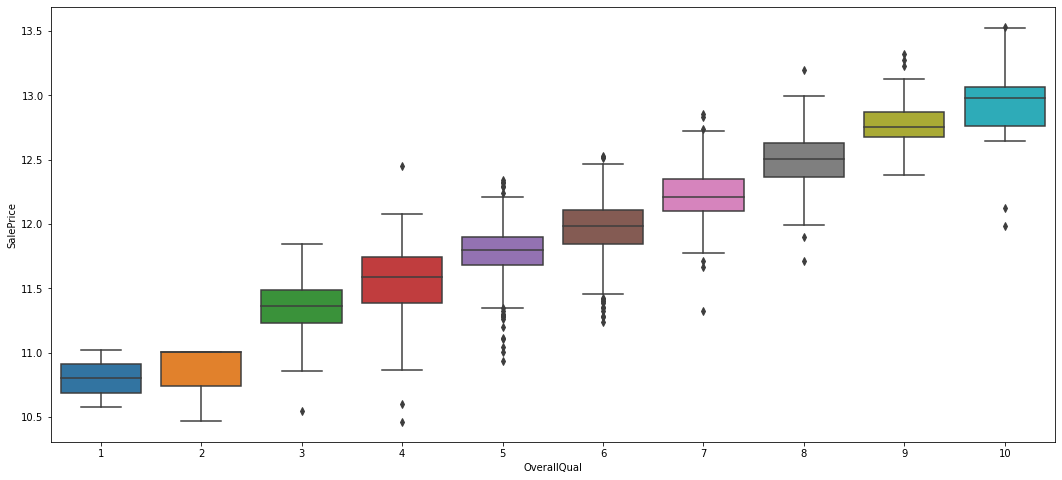

In [18]:
# for checking the outliers of OverallQual, as it is the most correlative feature

plt.figure(figsize=(18, 8))
sns.boxplot(x=data.OverallQual, y=data.SalePrice)

In [19]:
# necessity of IQR conversion

data.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,4.166438,3.028767,69.972603,10516.828082,0.995890,0.993836,1.942466,2.777397,3.019178,0.062329,...,2.758904,2.991096,3.504795,1.069178,43.489041,5.321918,1.815753,7.513014,3.770548,12.024057
std,4.161951,0.632017,22.076987,9981.264932,0.063996,0.249667,1.409156,0.707666,1.622634,0.276232,...,40.177307,0.140703,1.082912,0.372102,496.123024,2.703626,1.328095,1.552100,1.100854,0.399449
min,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,0.000000,3.000000,60.000000,7553.500000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,4.000000,1.000000,8.000000,4.000000,11.775105
50%,4.000000,3.000000,70.000000,9478.500000,1.000000,1.000000,3.000000,3.000000,4.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,5.000000,2.000000,8.000000,4.000000,12.001512
75%,6.000000,3.000000,79.000000,11601.500000,1.000000,1.000000,3.000000,3.000000,4.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,7.000000,3.000000,8.000000,4.000000,12.273736
max,14.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,4.000000,2.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,11.000000,4.000000,8.000000,5.000000,13.534474


In [20]:
# cleaning outliers by implementation of IQR

for col in data.columns:
    data[col] = np.where(data[col] <data[col].quantile(0.10),data[col].quantile(0.10),data[col])
    data[col] = np.where(data[col] >data[col].quantile(0.90),data[col].quantile(0.90),data[col])

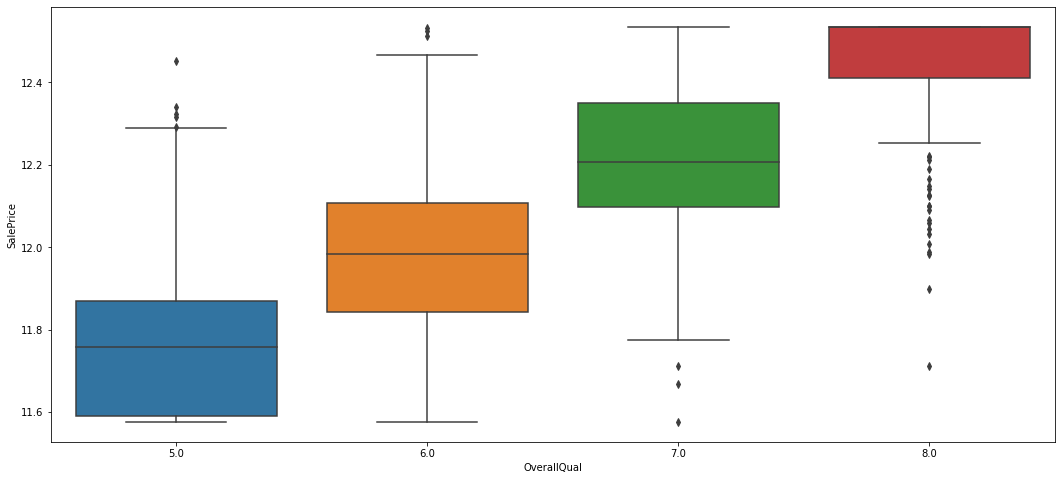

In [21]:
# again checking the outliers

plt.figure(figsize=(18, 8))
sns.boxplot(x=data.OverallQual, y=data.SalePrice)

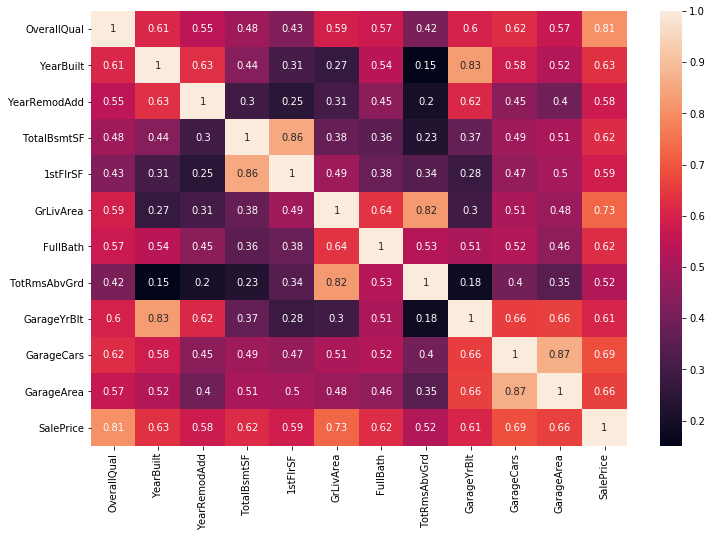

In [22]:
# again checking the correlation graph after treating outliers

top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [23]:
# division of dataset according to features and price

prices=data.SalePrice
features=data.drop("SalePrice",axis=1)

In [24]:
# feature Scaling to normalise data into a range

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)                
feature_ss = scaler.transform(features)
feature_ss

array([[ 0.24244087, -0.41895507, -0.32862306, ...,  0.13877749,
         0.38942175,  0.        ],
       [-1.03080974, -0.41895507,  0.80724262, ..., -0.61443862,
         0.38942175,  0.        ],
       [ 0.24244087, -0.41895507, -0.10144992, ...,  0.13877749,
         0.38942175,  0.        ],
       ...,
       [ 0.49709099, -0.41895507, -0.25289868, ...,  1.64520971,
         0.38942175,  0.        ],
       [-1.03080974, -0.41895507, -0.10144992, ...,  1.64520971,
         0.38942175,  0.        ],
       [-1.03080974, -0.41895507,  0.42862073, ...,  0.13877749,
         0.38942175,  0.        ]])

In [25]:
# applying PCA to reduce dimension of features for sake of ease computation

from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 55) #we have 55 features
covar_matrix.fit(feature_ss)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([19.6, 26.9, 33.3, 38.8, 42.5, 45.7, 48.8, 51.5, 54. , 56.3, 58.5,
       60.6, 62.6, 64.6, 66.5, 68.3, 69.9, 71.5, 73.1, 74.6, 76.1, 77.5,
       78.9, 80.2, 81.5, 82.7, 83.9, 85.1, 86.2, 87.2, 88.2, 89.1, 90. ,
       90.8, 91.6, 92.4, 93.1, 93.8, 94.4, 95. , 95.6, 96.1, 96.6, 97.1,
       97.5, 97.9, 98.2, 98.5, 98.8, 99. , 99.2, 99.4, 99.6, 99.7, 99.8])

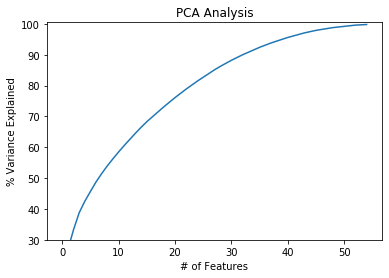

In [26]:
# plot scree curve to select number of components

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [27]:
# spliting dataset

X_train , X_test, y_train, y_test = train_test_split(feature_ss,prices,test_size=0.20,random_state=123)

In [28]:
#Linear Regression model

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred = linear.predict(X_test)

In [30]:
# r^2 score to examine the performance

r2_score(y_test, y_pred)

0.902632007441454

In [31]:
# Random Forest model

from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100,max_depth=11)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
y_pred_rf = model_rf.predict(X_test)

In [33]:
# performance
r2_score(y_test, y_pred_rf)

0.8823349619184937

In [34]:
# Gradient Boosting model

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
y_pred_gbr = GBR.predict(X_test)

In [36]:
# performance

r2_score(y_test, y_pred_gbr)

0.9154500617197306

In [37]:
# Linear Regression Lasso model

from sklearn import linear_model
linear_l = linear_model.Lasso(alpha=0.0005)
linear_l.fit(X_train,y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
y_pred_l=linear_l.predict(X_test)

In [39]:
# performance

r2_score(y_test,y_pred_l)

0.9043811328109281

In [40]:
# Linear Regression Ridge model with inbuilt Cross Validation

from sklearn.linear_model import RidgeCV
linear_rv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
linear_rv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [41]:
y_pred_lrv=linear_rv.predict(X_test)

In [42]:
# performance
r2_score(y_test,y_pred_lrv)

0.9026947395245617